In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.signal import butter,welch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import scipy

In [18]:
df = pd.read_csv('/home/devin/Documents/Galvanize/repos/Human-activity-recognition-using-smartphone-data/data/merged_data_save.csv')

In [19]:
x = df[(df['label'] == 1) & (df['user'] == 1)]

In [20]:
x.head()

,Unnamed: 0,X,Y,Z,label,gyroX,gyroY,gyroZ,user
7494,7494,1.533333,-0.376389,-0.081944,1,-0.138361,1.360702,0.236710,1.0
7495,7495,1.420833,-0.340278,-0.125000,1,-0.275806,1.642617,-0.082161,1.0
7496,7496,1.002778,-0.204167,-0.108333,1,-0.675922,0.670425,-0.083383,1.0
7497,7497,0.683333,-0.061111,-0.108333,1,-1.133461,-0.391565,0.118813,1.0
7498,7498,0.733333,-0.083333,-0.120833,1,-1.290758,-0.763582,0.105680,1.0


In [21]:
x.iloc[0:150]

,Unnamed: 0,X,Y,Z,label,gyroX,gyroY,gyroZ,user
7494,7494,1.533333,-0.376389,-0.081944,1,-0.138361,1.360702,0.236710,1.0
7495,7495,1.420833,-0.340278,-0.125000,1,-0.275806,1.642617,-0.082161,1.0
7496,7496,1.002778,-0.204167,-0.108333,1,-0.675922,0.670425,-0.083383,1.0
7497,7497,0.683333,-0.061111,-0.108333,1,-1.133461,-0.391565,0.118813,1.0
7498,7498,0.733333,-0.083333,-0.120833,1,-1.290758,-0.763582,0.105680,1.0
...,...,...,...,...,...,...,...,...,...
7639,7639,1.216667,0.025000,-0.038889,1,0.248317,-0.811840,-0.556193,1.0
7640,7640,1.318056,-0.002778,-0.159722,1,-0.030849,-0.711353,-0.372628,1.0
7641,7641,1.331944,-0.091667,-0.220833,1,-0.617585,-0.421497,-0.365297,1.0
7642,7642,1.331944,-0.091667,-0.220833,1,-1.137737,-0.510683,-0.559247,1.0


In [22]:
df = df[df['user'] != 0]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815614 entries, 248 to 1121785
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  815614 non-null  int64  
 1   X           815614 non-null  float64
 2   Y           815614 non-null  float64
 3   Z           815614 non-null  float64
 4   label       815614 non-null  int64  
 5   gyroX       815614 non-null  float64
 6   gyroY       815614 non-null  float64
 7   gyroZ       815614 non-null  float64
 8   user        815614 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 62.2 MB


In [24]:
df_walk = df[df['label'] == 1].reset_index()
df_up = df[df['label']== 2]
df_down = df[df['label'] == 3]
df_sit = df[df['label'] == 4]
df_standing = df[df['label'] == 5]
df_lay = df[df['label'] == 6].reset_index()

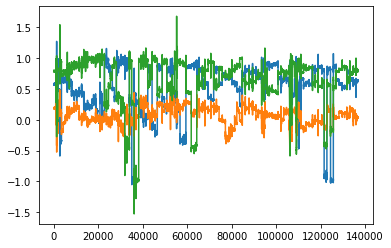

In [25]:
df_lay['Z'].plot()
df_lay['X'].plot()
df_lay['Y'].plot()

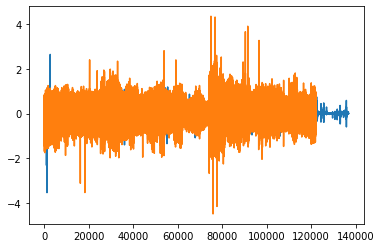

In [26]:
df_lay['gyroX'].plot()
df_walk['gyroX'].plot()

In [27]:
df_lay.head()

,index,Unnamed: 0,X,Y,Z,label,gyroX,gyroY,gyroZ,user
0,3661,3661,0.183333,0.784722,0.568056,6,-0.032070,-0.034514,0.000611,1.0
1,3662,3662,0.188889,0.783333,0.581944,6,-0.013134,-0.028405,-0.002138,1.0
2,3663,3663,0.197222,0.780556,0.577778,6,-0.021075,-0.001527,-0.003360,1.0
3,3664,3664,0.195833,0.776389,0.581944,6,-0.009163,0.006720,0.000305,1.0
4,3665,3665,0.184722,0.775000,0.568056,6,0.005192,0.000611,-0.007330,1.0


In [28]:
def compute_fft(data, dt=.02):
    
    n = len(data)
    fhat = np.fft.fft(data,n)
    PSD = fhat* np.conj(fhat)/n
    freq = (1/(dt*n))*np.arange(n)
    L = np.arange(1,np.floor(n/2),dtype='int')
    return PSD, freq, L

In [29]:
def butter_highpass(signal,highcut=.5, fs=50, order=2):
    nyq = 0.5 * fs
    high = highcut / nyq
    b, a = butter(order, high, btype="highpass")
    y = scipy.signal.filtfilt(b,a,signal,axis=0)
    return(y)


       index         Z
0          0 -0.118056
1          1 -0.245833
2          2 -0.125000
3          3 -0.027778
4          4 -0.044444
...      ...       ...
12395  12395  0.043056
12396  12396  0.077778
12397  12397  0.058333
12398  12398  0.036111
12399  12399  0.041667

[12400 rows x 2 columns]


(0, 100)

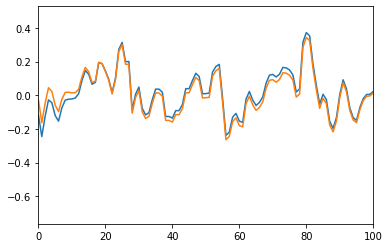

In [30]:
data_walk = df_walk['Z'].copy()
# data_walk.reset_index()
data = butter_highpass(data_walk.iloc[7600:20000])
plot_data = data_walk
raw_data = data_walk.iloc[7600:20000].reset_index()['Z']
print(raw_data.reset_index())
# data_walk = pd.DataFrame(data_walk)
# data_walk['filtered'] = data
data_walk.head()
fig,ax = plt.subplots()
# ax.plot(data_walk)
ax.plot(raw_data)
ax.plot(data)
plt.xlim(0,100)
# ax.plot(data[0:100])

/home/devin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/devin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/devin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/devin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/devin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.

(0.5731095864540385, 50)

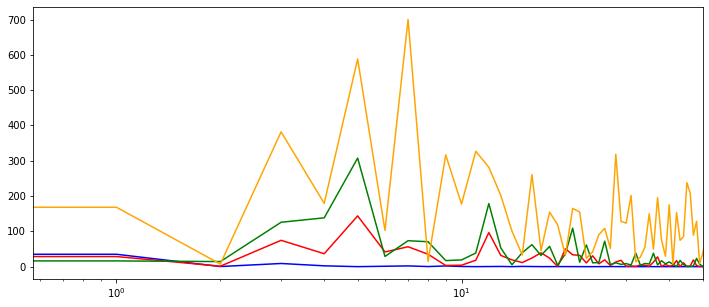

In [31]:
PSD, freq, L = compute_fft(data,dt=.02)
PSD2, freq2,L2 = compute_fft(raw_data,dt=.02)
psd_down, freq_down,l_down = compute_fft(df_down['Z'], dt=.02)
psd_up, freq_up,l_up = compute_fft(df_up['Z'], dt=.02)
psd_lay, freq_lay,l_lay = compute_fft(df_lay['Z'], dt=.02)
fig, ax = plt.subplots(figsize=(12,5))
# ax.plot(freq[L], PSD[L],color='red',alpha=.5)
ax.semilogx(PSD2[L2],color='blue')
ax.semilogx(psd_down[l_down],color='red')
ax.semilogx(psd_up[l_up],color='green')
ax.semilogx(psd_lay[l_lay],color='orange')
# ax.plot(PSD2[L2],color='blue',alpha=.5)
plt.xlim(0,50)

/home/devin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 2.5)

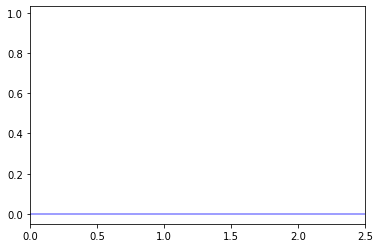

In [32]:
data_walk = df_walk['Z'].copy()
data_walk['filtered'] = data
data_up = df_up['Z'].copy()
dt = 0.02
# PSD, freq, L = compute_fft(data_up,dt)
PSD2, freq2,L2 = compute_fft(data_walk['filtered'],dt)

fig, ax = plt.subplots()
# ax.plot(freq[L], PSD[L],color='red',alpha=.5)
ax.plot(PSD2[L2],color='blue',alpha=.5)

plt.xlim(0,2.5)
# # ax[1].plot(freq2[L2], PSD2[L2])
# # plt.xlim(freq[L[0]],freq[L[-1]])
# plt.show()

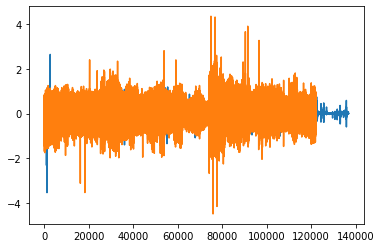

In [33]:
df_lay['gyroX'].plot()
df_walk['gyroX'].plot()

/home/devin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/devin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/devin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/devin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/devin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.

(0.5731095864540385, 50)

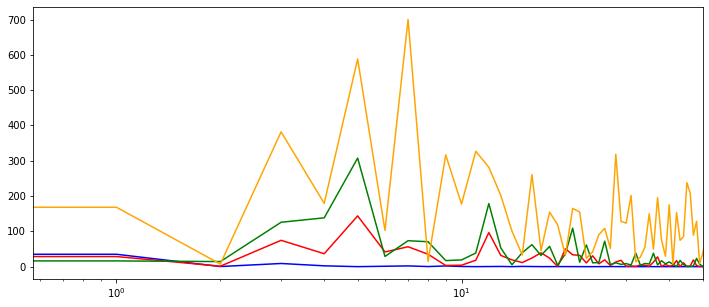

In [34]:
PSD, freq, L = compute_fft(data,dt=.02)
PSD2, freq2,L2 = compute_fft(raw_data,dt=.02)
psd_down, freq_down,l_down = compute_fft(df_down['Z'], dt=.02)
psd_up, freq_up,l_up = compute_fft(df_up['Z'], dt=.02)
psd_lay, freq_lay,l_lay = compute_fft(df_lay['Z'], dt=.02)
fig, ax = plt.subplots(figsize=(12,5))
# ax.plot(freq[L], PSD[L],color='red',alpha=.5)
ax.semilogx(PSD2[L2],color='blue')
ax.semilogx(psd_down[l_down],color='red')
ax.semilogx(psd_up[l_up],color='green')
ax.semilogx(psd_lay[l_lay],color='orange')
# ax.plot(PSD2[L2],color='blue',alpha=.5)
plt.xlim(0,50)

In [35]:
# f,power = welch(butter_highpass(df_walk['Z']),fs=50)
f,power = welch(data,fs=50,scaling='spectrum',average='median')
f2,power2 = welch(butter_highpass(df_up['Z']),fs=50,average='median')
f3,power3 = welch(butter_highpass(df_lay['Z']),fs=50,average='median')
f4,power4 = welch(butter_highpass(df_down['Z']),fs=50,average='median')

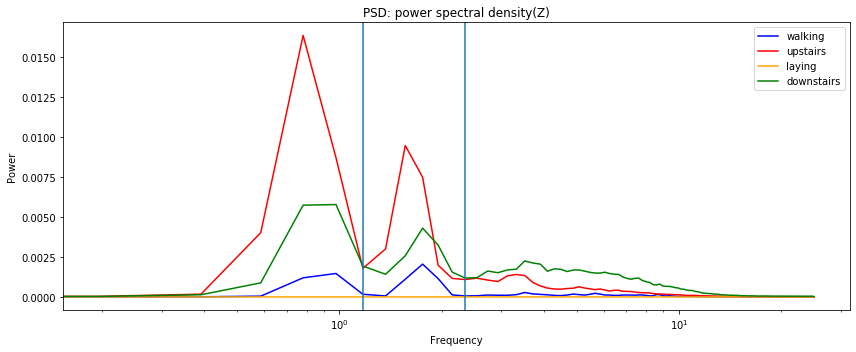

In [36]:
plt.figure(figsize=(12, 5))
plt.semilogx(f, power,color='blue',label='walking')
plt.semilogx(f2, power2,color='red',label='upstairs')
plt.semilogx(f3,power3,color='orange',label='laying')
plt.semilogx(f4,power4,color='green',label='downstairs')
plt.axvline(x=1.171875)
plt.axvline(x=2.34375)
plt.title('PSD: power spectral density(Z)')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

In [37]:
f,power = welch(butter_highpass(df_walk['X']),fs=50)
f2,power2 = welch((df_up['X']),fs=50)
f3,power3 = welch(butter_highpass(df_lay['X']),fs=50)
f4,power4 = welch(butter_highpass(df_down['X']),fs=50)

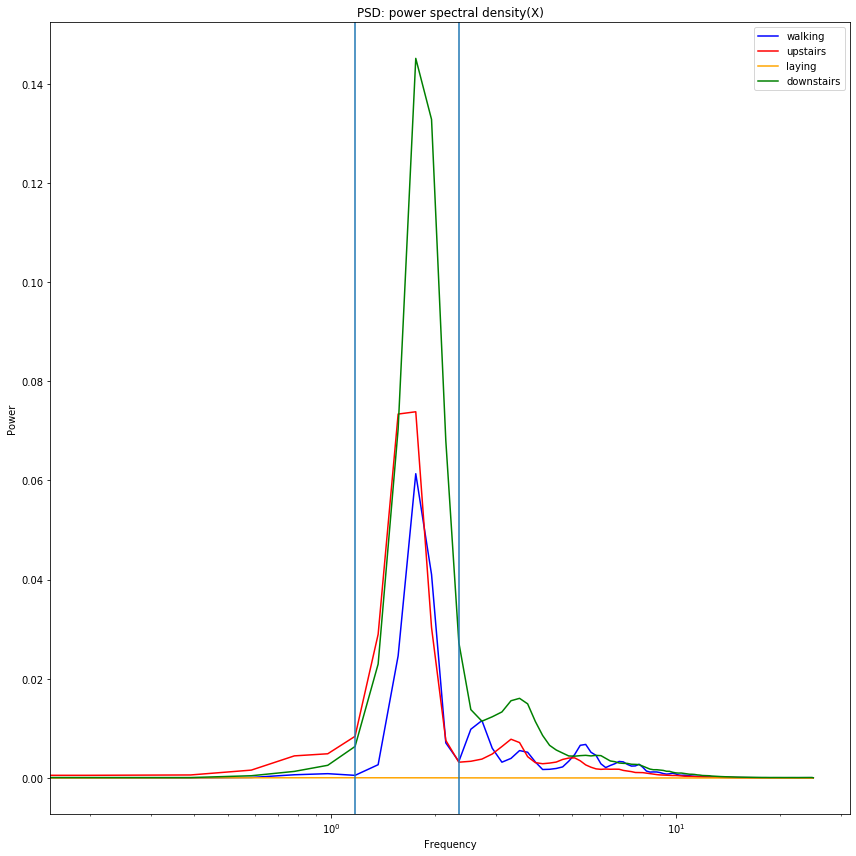

In [38]:
plt.figure(figsize=(12,12))
plt.semilogx(f, power,color='blue',label='walking')
plt.semilogx(f2, power2,color='red',label='upstairs')
plt.semilogx(f3,power3,color='orange',label='laying')
plt.semilogx(f4,power4,color='green',label='downstairs')
plt.title('PSD: power spectral density(X)')
plt.axvline(x=1.171875)
plt.axvline(x=2.34375)
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

In [39]:
f,power = welch(butter_highpass(df_walk['Y']),fs=50)
f2,power2 = welch(butter_highpass(df_up['Y']),fs=50)
f3,power3 = welch(butter_highpass(df_lay['Y']),fs=50)
f4,power4 = welch(butter_highpass(df_down['Y']),fs=50)

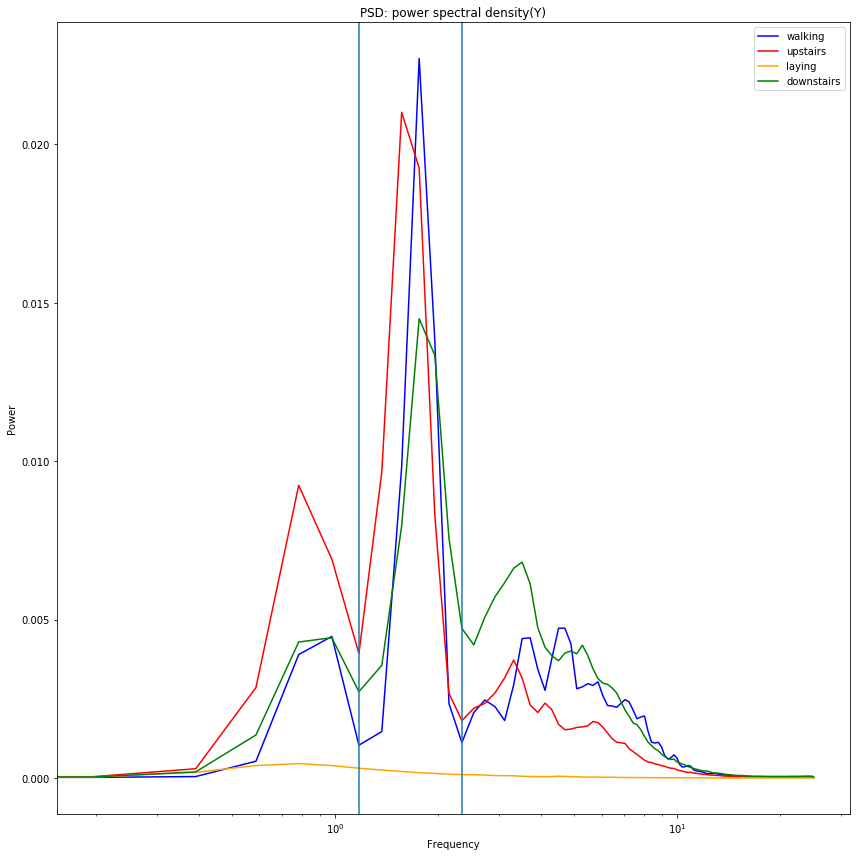

In [40]:
plt.figure(figsize=(12,12))
# f = np.linspace(0,50,129)
plt.semilogx(f, power,color='blue',label='walking')
plt.semilogx(f2, power2,color='red',label='upstairs')
plt.semilogx(f3,power3,color='orange',label='laying')
plt.semilogx(f4,power4,color='green',label='downstairs')
plt.title('PSD: power spectral density(Y)' )
plt.axvline(x=1.171875)
plt.axvline(x=2.34375)
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

In [41]:
from scipy.integrate import simps

In [42]:
x1 = f[0:7]
x2 = f[6:13]
x3 = f[12:21]

In [43]:
f

array([ 0.       ,  0.1953125,  0.390625 ,  0.5859375,  0.78125  ,
        0.9765625,  1.171875 ,  1.3671875,  1.5625   ,  1.7578125,
        1.953125 ,  2.1484375,  2.34375  ,  2.5390625,  2.734375 ,
        2.9296875,  3.125    ,  3.3203125,  3.515625 ,  3.7109375,
        3.90625  ,  4.1015625,  4.296875 ,  4.4921875,  4.6875   ,
        4.8828125,  5.078125 ,  5.2734375,  5.46875  ,  5.6640625,
        5.859375 ,  6.0546875,  6.25     ,  6.4453125,  6.640625 ,
        6.8359375,  7.03125  ,  7.2265625,  7.421875 ,  7.6171875,
        7.8125   ,  8.0078125,  8.203125 ,  8.3984375,  8.59375  ,
        8.7890625,  8.984375 ,  9.1796875,  9.375    ,  9.5703125,
        9.765625 ,  9.9609375, 10.15625  , 10.3515625, 10.546875 ,
       10.7421875, 10.9375   , 11.1328125, 11.328125 , 11.5234375,
       11.71875  , 11.9140625, 12.109375 , 12.3046875, 12.5      ,
       12.6953125, 12.890625 , 13.0859375, 13.28125  , 13.4765625,
       13.671875 , 13.8671875, 14.0625   , 14.2578125, 14.4531

In [44]:
simps(power[0:7],x=x1,dx=.1)

0.0018921112786530543

In [45]:
simps(power4[0:7],x=x1,dx=.1)

0.0022823985500106865

In [46]:
simps(power2[0:7],x=x1,dx=.1)

0.004056732014509223

In [47]:
f,power = welch(butter_highpass(df_walk['gyroZ']),fs=50)
f2,power2 = welch(butter_highpass(df_up['gyroZ']),fs=50)
f3,power3 = welch(butter_highpass(df_lay['gyroZ']),fs=50)
f4,power4 = welch(butter_highpass(df_down['gyroZ']),fs=50)

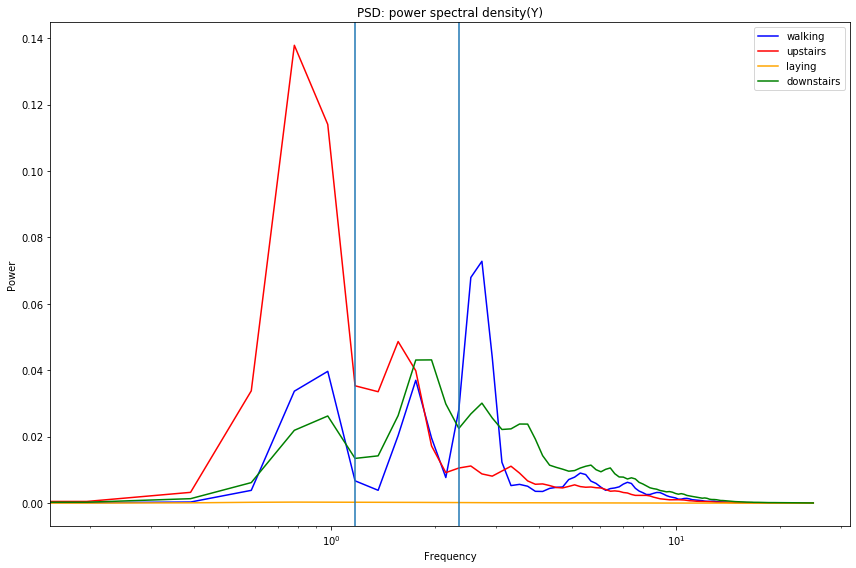

In [69]:
plt.figure(figsize=(12,8))
# f = np.linspace(0,50,129)
plt.semilogx(f, power,color='blue',label='walking')
plt.semilogx(f2, power2,color='red',label='upstairs')
plt.semilogx(f3,power3,color='orange',label='laying')
plt.semilogx(f4,power4,color='green',label='downstairs')
plt.title('PSD: power spectral density(Y)' )
plt.axvline(x=1.171875)
plt.axvline(x=2.34375)
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

In [49]:
calc_df = pd.read_csv('../data/calculated_data.csv')

In [50]:
calc_df.head()

,Participant,activitiy,x_0_1.17,x_1.17_2.34,x_2.34_4.1,y_0_1.17,y_1.17_2.34,y_2.34_4.1,z_0_1.17,z_1.17_2.34,z_2.34_4.1,gyrox_0_1.17,gyrox_1.17_2.34,gyrox_2.34_4.1,gyroy_0_1.17,gyroy_1.17_2.34,gyroy_2.34_4.1,gyroz_0_1.17,gyroz_1.17_2.34,gyroz_2.34_4.1
0,1,1,0.016325,0.011405,0.013500,0.007980,0.008298,0.006556,0.021536,0.003069,0.001562,0.177778,0.099675,0.029399,0.260460,0.030812,0.067293,0.017617,0.018721,0.010816
1,1,1,0.030255,0.007792,0.012951,0.011027,0.010194,0.009899,0.013291,0.002335,0.002899,0.070810,0.105690,0.052048,0.245152,0.116110,0.054259,0.028653,0.036051,0.012884
2,1,1,0.028834,0.017473,0.016532,0.015216,0.017804,0.010017,0.011995,0.001744,0.004193,0.084805,0.162307,0.057898,0.216542,0.211029,0.167176,0.041498,0.042607,0.026189
3,1,1,0.029166,0.016313,0.012911,0.013901,0.015096,0.009704,0.013414,0.002269,0.003967,0.025780,0.168549,0.043290,0.241572,0.184906,0.064743,0.055776,0.049093,0.011790
4,1,1,0.025361,0.014038,0.020731,0.011155,0.017442,0.011596,0.016846,0.002060,0.003240,0.052114,0.157882,0.058679,0.258282,0.154459,0.128604,0.062860,0.044833,0.017156


In [51]:
X = calc_df.drop(columns=['activitiy','Participant'],axis=1)

In [52]:
y = calc_df['activitiy']

In [62]:
calc_df['activitiy'].value_counts()[1]

1026

In [65]:
sizes = [calc_df['activitiy'].value_counts()[i] for i in range(1,7)]
colors = ['blue','red','green','black','brown', 'orange']

([<matplotlib.patches.Wedge at 0x7f1a5f8f2ed0>,
 [Text(0.9586596122486035, 0.5394179713759613, ''),
  Text(0.06013931017871509, 1.0983547984923763, ''),
  Text(-0.8547279943112065, 0.6924161001455283, ''),
  Text(-1.0493247510807315, -0.33002661524392385, ''),
  Text(-0.16939091423969208, -1.0868793484895374, ''),
  Text(0.9243241489400935, -0.5963429111561334, '')])

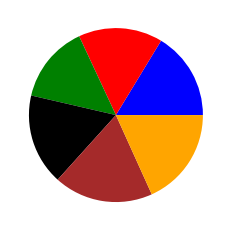

In [68]:
plt.pie(sizes,colors= colors)